## Support Vector Machines (SVM)

**Support Vector Machines (SVM) used to find a best separating line between data of 2 different classes. The objective of SVM is to maximize the robustness of the result, because it try to find the maximum margin (the distance from the separating line to the nearest points that does not relative to the both classes)**

Advantages:
1. Work well with the complicated domain with the clear marginal seperation
2. Versatile as allow to play around with different kernel functions

Disadvantages:
1. Do not work well with large data set because the require large training cost
2. Do not work well with data set with a lot of noises, and may cause overfitting by the noises
3. Poor perform if number of features is much greater than the number of samples

Main Parameters:

- kernel (default='rbf') = 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'  
- C (default=1.0) = the larger of C, the more training points correct (becareful, this may cause overfitting!!!)
- gammar (default='auto') = defines how far a single training example reaches. 
  High gamma value, the decision boundary is only depend on the training points that very close to it and ignoring the training points that is far away from the decision boundary. The decision boundary is smoother as the closeby training points has greater weight.
  Low gamma value, the training points that is far away from the decision boundary are also taking into consideration. 

In [1]:
import random

def makeTerrainData(n_points=1000):
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]
    
    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

In [107]:
def classifySVM(features_train, labels_train):   
    ### import the sklearn module for SVM
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
    from sklearn import svm
    clf = svm.SVC(kernel='rbf',C=1000000, gamma='auto') # 92% accuracy
    #clf = svm.NuSVC() # 89.2% accuracy
    #clf = svm.LinearSVC() # 91.2% accuracy
    clf.fit(features_train, labels_train)
    return clf

In [3]:
import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

import base64
import json
import subprocess

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    %matplotlib inline
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    #plt.savefig("test.png")
    
def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print(image_start, json.dumps(data), image_end)

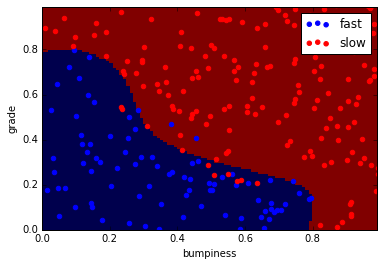

In [108]:
# MAIN

"""Use sklearn Support Vector Machines (SVM) classifier to classify the terrain data.
   Objective of this exercise is to recreate the decision boundary found in the lesson video, and make a plot that
   visually shows the decision boundary """ 
features_train, labels_train, features_test, labels_test = makeTerrainData()

# the training data (features_train, labels_train) have both "fast" and "slow" points mixed
# in together--separate them so we can give them different colors in the scatterplot,
# and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

clf = classifySVM(features_train, labels_train)

# draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)

In [109]:
# Calculating SVM accuracy
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)
print("{0}%".format(accuracy_score(labels_test, pred)*100))

94.8%
